## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Loading Data Set

In [2]:
path = r"E:\FSDS With GEN AI_NIT\4. April\24th- Student Mark Prediction Project, Ml Interview Prep\student mark price prediction\student_info.csv"
df = pd.read_csv(path)

In [17]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [ ]:
df.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [4]:
df.shape

(200, 2)

## Display the visualization of data to get Insights

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


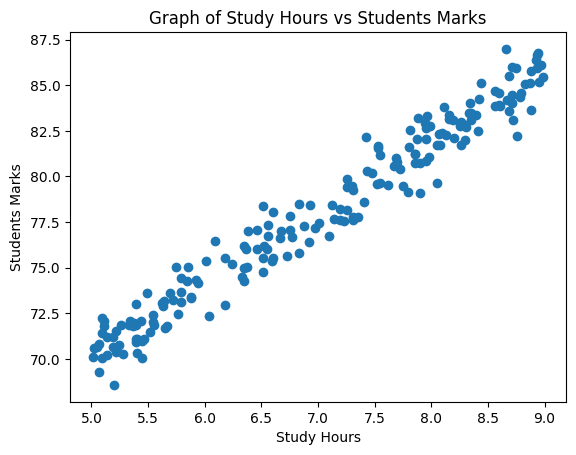

In [7]:

plt.scatter(x = df.study_hours, y = df.student_marks)
plt.title("Graph of Study Hours vs Students Marks")
plt.xlabel("Study Hours")
plt.ylabel("Students Marks")
plt.show()

## Prepare Data for Machine Learning Model
Data Cleaning

In [8]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [9]:
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

from above we can see that study_hour columns has 5 mission values. so we will fill those missing values with mean and create new data frame with all filled values.

In [10]:
df2 = df.fillna(df.mean())
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [11]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [12]:
df2.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


Now we can see that new dataframe has no missing values. so we will use this new dataframe for futher rocessing.

## Spliiting the data into Independent and Target variable

In [23]:
X = df2[['study_hours']]
y = df2[['student_marks']]
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (200, 1)
Shape of y:  (200, 1)


## Split the data into training and testing set

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 51)
print('shape of X_train:', X_train.shape)
print('shape of y_train:', y_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (160, 1)
shape of y_train: (160, 1)
shape of X_test: (40, 1)
shape of y_test: (40, 1)


## Built a simple Linear Regression Model

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## Fit the training data into model

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

## Compute Slope and Intercept to predict future value

In [30]:
slope = lr.coef_
intercept = lr.intercept_
print("Slope: ", slope)
print("Intercept: ", intercept)

Slope:  [[3.93571802]]
Intercept:  [50.44735504]


## Predict student mark for given study hours using Slope and Intercept

In [ ]:
# y = mx + c
y = slope * X + intercept

#Precict students marks for 4 hours of study
y = slope * 4 + intercept
y

array([[66.1902271]])

In [33]:
lr.predict([[4]])[0][0].round(2)

np.float64(66.19)

In [34]:
y_pred = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

## Craete dataframe for student predicted marks along with study hours

In [36]:
pd.DataFrame(np.c_[X_test,y_test, y_pred], columns = ['Study_Hours','Students_Actual_Marks', 'Students_Predicted_Marks'])

,Study_Hours,Students_Actual_Marks,Students_Predicted_Marks
0,8.300000,82.02,83.113815
1,7.230000,77.55,78.902596
2,8.670000,84.19,84.570030
3,8.990000,85.46,85.829460
4,8.710000,84.03,84.727459
5,7.700000,80.81,80.752384
6,5.690000,73.61,72.841591
7,5.390000,70.90,71.660875
8,5.790000,73.14,73.235162
9,5.390000,73.02,71.660875


## Fine Tune Model

In [39]:
Variance = lr.score(X_test, y_test)
Variance

0.9514124242154464

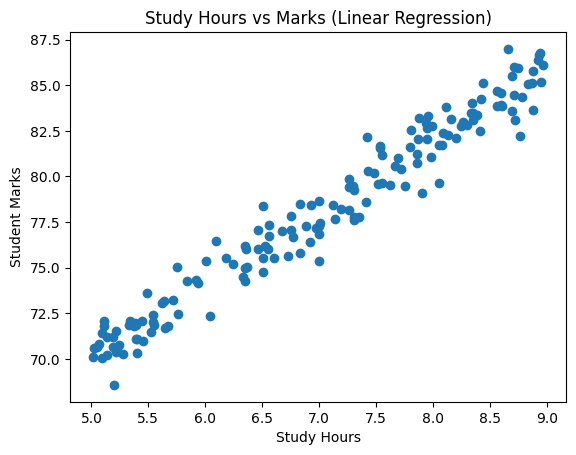

In [48]:
plt.scatter(X_train,y_train)
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.title("Study Hours vs Marks (Linear Regression)")
plt.show()

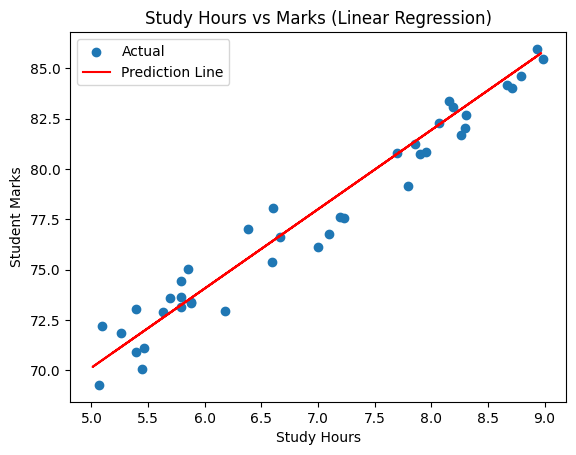

In [43]:
plt.scatter(X_test, y_test, label="Actual")
plt.plot(X_train, lr.predict(X_train), color='red', label="Prediction Line")
plt.xlabel("Study Hours")
plt.ylabel("Student Marks")
plt.title("Study Hours vs Marks (Linear Regression)")
plt.legend()
plt.show()


## Present Solution

## Save Ml Model

In [44]:
import joblib
joblib.dump(lr, 'student_marks_model.pkl')

['student_marks_model.pkl']

In [45]:
model = joblib.load("student_marks_model.pkl")

In [47]:
model.predict([[5]])[0][0]


np.float64(70.12594512018406)